In [12]:
import zipfile

with zipfile.ZipFile("/content/archive (3).zip", 'r') as zip_ref:
    zip_ref.extractall("/content/real_estate_data")

In [13]:
import pandas as pd

# Doğru dosya yolunu kullanarak CSV'yi oku
df = pd.read_csv("/content/real_estate_data/processed_turkish_house_sales.csv")

# İlk 5 satırı göster
df.head()


,satici_tip,Metrekare,Oda_Sayisi,il,Ilce,Mahalle,Tarih,fiyat
0,Sahibinden,160.0,3.5+1,Istanbul,Şişli,Esentepe,25 Mayıs 2025,8750000
1,Sahibinden,85.0,2+1,Istanbul,Kartal,Topselvi,25 Mayıs 2025,4899000
2,Sahibinden,110.0,3+1,Istanbul,Tuzla,Aydınlı,24 Mayıs 2025,5900000
3,Sahibinden,200.0,6+1,Istanbul,Sultanbeyli,Necipfazıl,24 Mayıs 2025,6999999
4,Sahibinden,120.0,2+1,Istanbul,Esenyurt,Bilinmiyor,24 Mayıs 2025,1625000


In [14]:
# Veri setinin boyutu
print("Satır sayısı:", df.shape[0])
print("Sütun sayısı:", df.shape[1])

# Veri türleri
print("\nSütun türleri:")
print(df.dtypes)

# Eksik değer kontrolü
print("\nEksik değerler:")
print(df.isnull().sum())


Satır sayısı: 15276
Sütun sayısı: 8

Sütun türleri:
satici_tip     object
Metrekare     float64
Oda_Sayisi     object
il             object
Ilce           object
Mahalle        object
Tarih          object
fiyat           int64
dtype: object

Eksik değerler:
satici_tip    0
Metrekare     0
Oda_Sayisi    0
il            0
Ilce          0
Mahalle       0
Tarih         0
fiyat         0
dtype: int64


In [15]:
df.isnull().sum()


,0
satici_tip,0
Metrekare,0
Oda_Sayisi,0
il,0
Ilce,0
Mahalle,0
Tarih,0
fiyat,0


In [16]:
df.columns


Index(['satici_tip', 'Metrekare', 'Oda_Sayisi', 'il', 'Ilce', 'Mahalle',
       'Tarih', 'fiyat'],
      dtype='object')

In [17]:
# Şehir bazlı ortalama fiyat
city_avg_price = df.groupby('il')['fiyat'].mean().sort_values(ascending=False)

# Sonuçları göster
print(city_avg_price)


il
Mugla             7.440271e+06
Istanbul          6.039804e+06
Bursa             4.376296e+06
Aydin             4.167252e+06
Tunceli           4.042222e+06
Diyarbakir        4.014120e+06
Canakkale         4.006500e+06
Samsun            3.709812e+06
Hatay             3.598026e+06
Bingol            3.466810e+06
Sinop             3.398000e+06
Van               3.329845e+06
Usak              3.260157e+06
Afyonkarahisar    3.169160e+06
Erzurum           3.147986e+06
Artvin            3.000990e+06
Duzce             2.952381e+06
Osmaniye          2.901991e+06
Bilecik           2.878746e+06
Ardahan           2.751937e+06
Bayburt           2.700707e+06
Hakkari           2.442500e+06
Kilis             2.169054e+06
Name: fiyat, dtype: float64


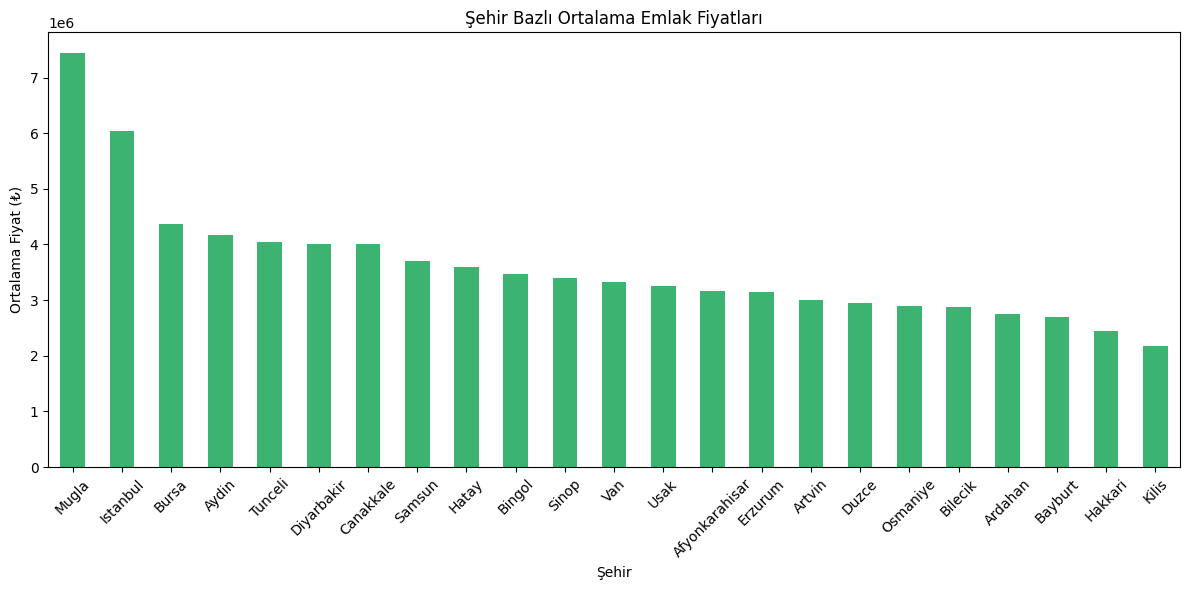

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
city_avg_price.plot(kind='bar', color='mediumseagreen')

plt.title("Şehir Bazlı Ortalama Emlak Fiyatları")
plt.xlabel("Şehir")
plt.ylabel("Ortalama Fiyat (₺)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


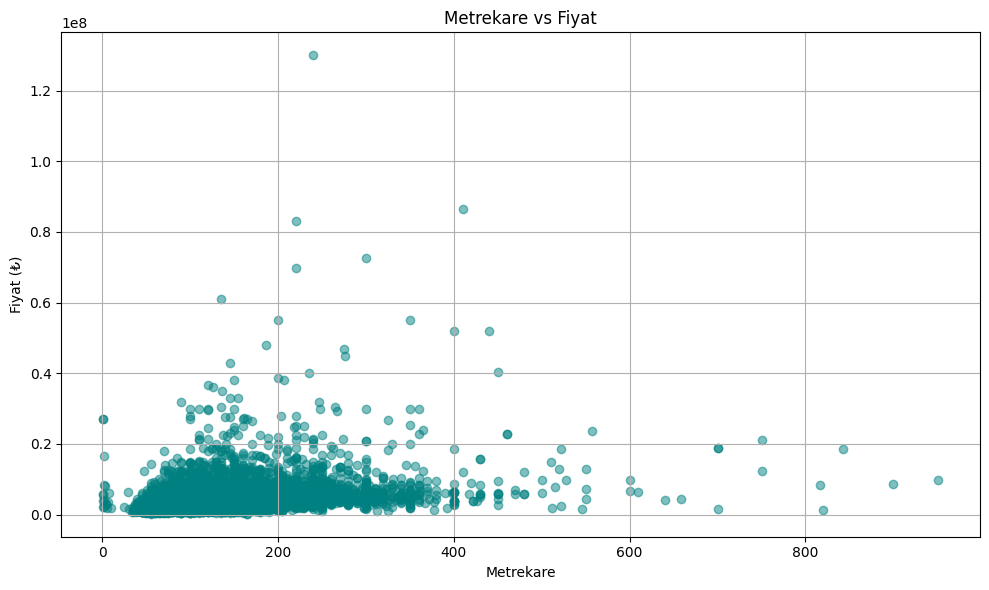

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(df['Metrekare'], df['fiyat'], alpha=0.5, color='teal')

plt.title("Metrekare vs Fiyat")
plt.xlabel("Metrekare")
plt.ylabel("Fiyat (₺)")
plt.grid(True)
plt.tight_layout()
plt.show()


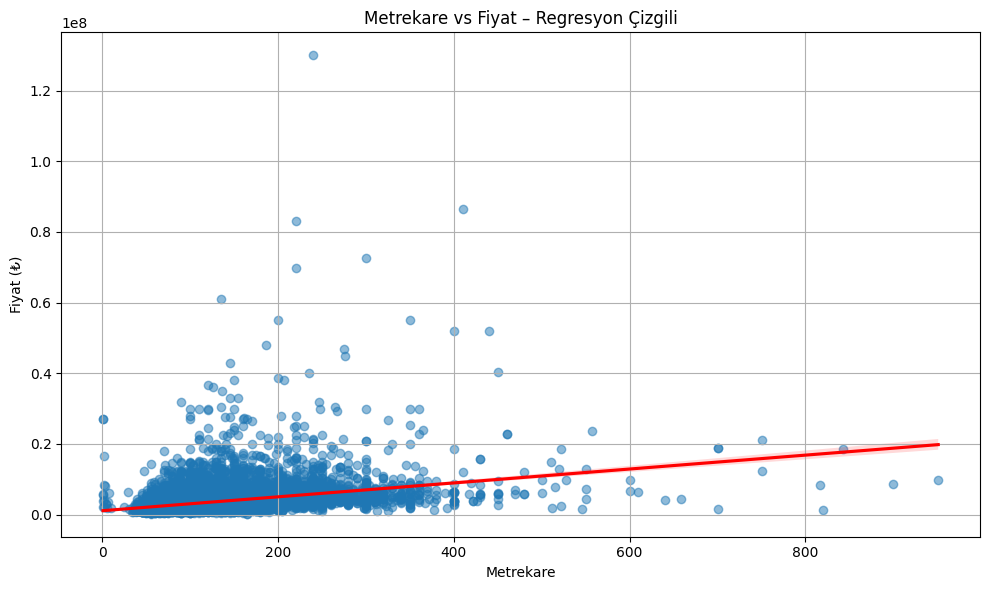

In [23]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.regplot(x='Metrekare', y='fiyat', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title("Metrekare vs Fiyat – Regresyon Çizgili")
plt.xlabel("Metrekare")
plt.ylabel("Fiyat (₺)")
plt.grid(True)
plt.tight_layout()
plt.show()


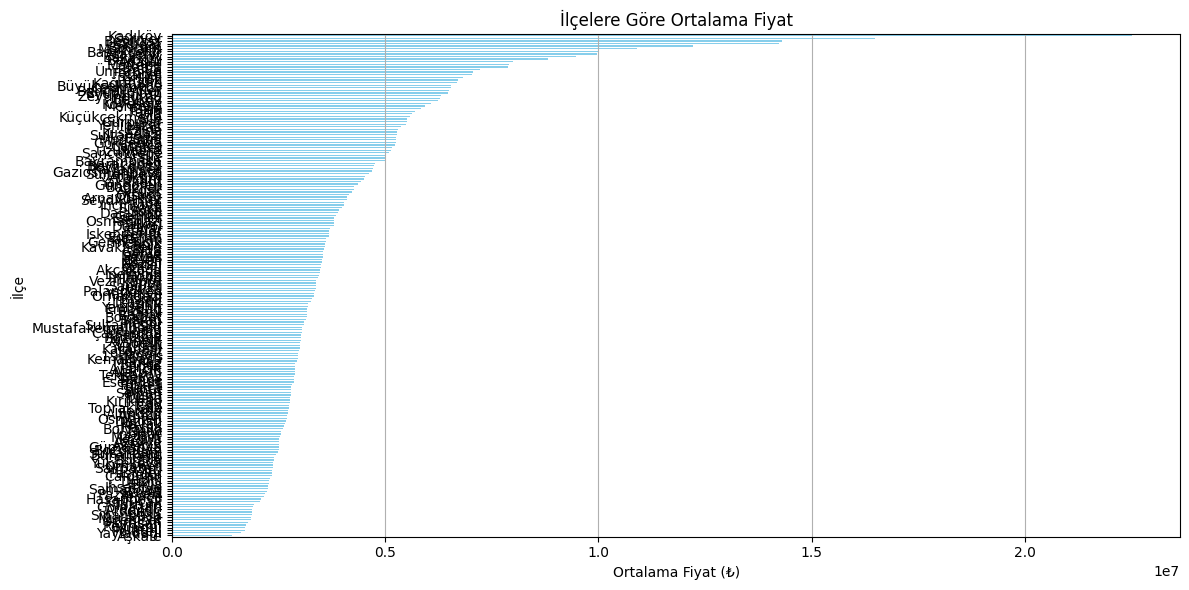

In [24]:
ilce_fiyat = df.groupby('Ilce')['fiyat'].mean().sort_values()

plt.figure(figsize=(12,6))
ilce_fiyat.plot(kind='barh', color='skyblue')
plt.title("İlçelere Göre Ortalama Fiyat")
plt.xlabel("Ortalama Fiyat (₺)")
plt.ylabel("İlçe")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


/tmp/ipython-input-740384711.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Oda_Sayisi', y='fiyat', data=df, palette='pastel')


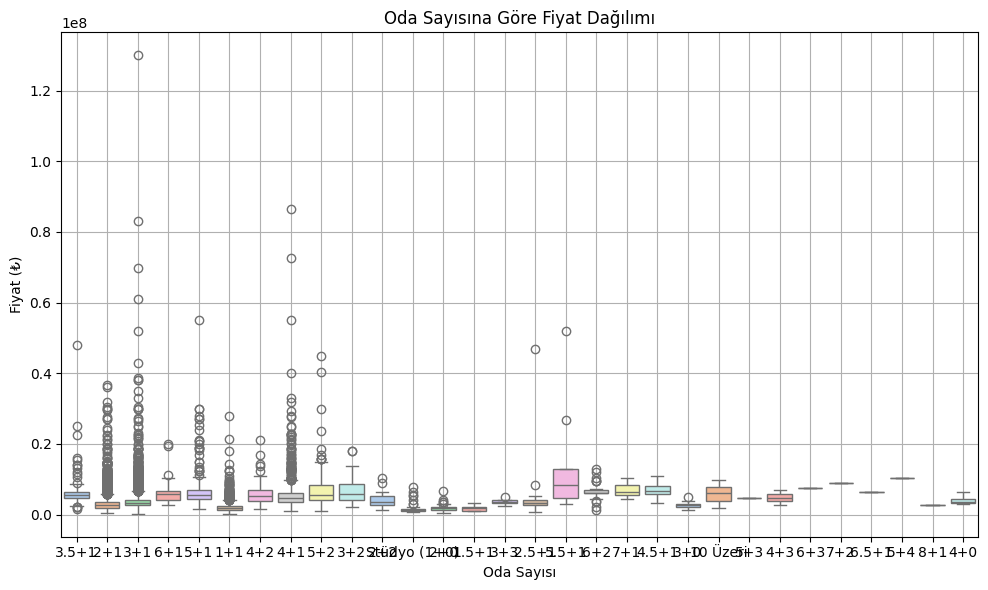

In [31]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Oda_Sayisi', y='fiyat', data=df, palette='pastel')
plt.title("Oda Sayısına Göre Fiyat Dağılımı")
plt.xlabel("Oda Sayısı")
plt.ylabel("Fiyat (₺)")
plt.grid(True)
plt.tight_layout()
plt.show()
